[5000, 5000, 980, 1135]
Your trainset and testset are generated successfully!


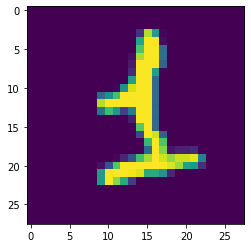

shape : = (5000, 28, 28) , dimensions: = 3
pic max: = 255
pic min: = 0
length===========: 5000
 0 Actual mean is : 29.715561224489797
 0 Actual STD is : 74.02908600121187
X0_train matrix Value : 39.94005102040816
TRAIN 0: MeanMean: 44.21464285714285
TRAIN 0: MeanVar: 115.55025890254043
TRAIN 0: StdMean : 87.43059533674786
TRAIN 0: StdVar: 101.46880329712326
TRAIN1 : MeanMean: 19.41101964285712
TRAIN1 : MeanVar: 32.700343806108954
TRAIN1 : StdMean: 61.38655612666874
TRAIN1 : StdVar: 84.80371151566843
TEST 0 matrix Value : 47.21173469387755 , shape:= (980, 2)
TEST 1 matrix Value : 12.590561224489797, shape:= (1135, 2)
shape (980, 2)
ac0:  0.9163265306122449
ac1:  0.9233480176211454


In [57]:
import numpy as np
import scipy.io
import math
import geneNewData
import scipy.io
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import matplotlib.image as mpimg

from math import sqrt
from math import pi
from math import exp


def compute_dataset(setofdata):
    #create a empty 2-d [(lentrain0 x 2) array]
    newdataset = np.empty([len(setofdata) , 2]) 
    for i in range(setofdata.shape[0]):           
        newdataset[i][0]  = np.mean(setofdata[i])
        newdataset[i][1]  = np.std(setofdata[i])
    return newdataset

'''
def calculate_pdf(x, mean, var):
       
    exponent = exp(-((x - mean)**2 / (2 * (var) )))
    pdf = (1 / (np.sqrt(2 * np.pi) * (var))) * exponent
    #print('========probability:' ,pdf)
    return pdf
'''

def calculate_pdf(x, mean, std):       
    exponent = exp(-((x - mean)**2 / (2 * (std**2) )))
    pdf = (1 / (sqrt(2 * pi) * std)) * exponent
    #print('========probability:' ,pdf)
    return pdf


                   
def naive_bayes(testset , train0data, train1data):
    
    data0_mean = np.mean(train0data, axis = 0 )
    data0_var = np.var(train0data, axis = 0 )
    data0_std = np.std(train0data, axis = 0 )
           
    data0_meanMean = data0_mean[0]
    data0_meanVar = data0_var[0]    
    data0_meanStd = data0_std[0]
    
    data0_stdMean = data0_mean[1]
    data0_stdVar = data0_var[1] 
    data0_stdStd = data0_std[1]    
    
    data1_mean = np.mean(train1data, axis = 0)
    data1_var = np.var(train1data, axis = 0)
    data1_std = np.std(train1data, axis = 0 )
           
    data1_meanMean = data1_mean[0]
    data1_meanVar = data1_var[0]
    data1_meanStd = data1_std[0] 
           
    data1_stdMean = data1_mean[1]
    data1_stdVar = data1_var[1]
    data1_stdStd = data1_std[1]
    
    Py = 0.5
    Px_y = []
      
    for i in range(testset.shape[0]):
        Px1_y0 = 0
        Px2_y0 = 0
        Px_y0 = 0
        Px1_y0 = calculate_pdf(testset[i][0],data0_meanMean, data0_meanStd)
        Px2_y0 = calculate_pdf(testset[i][1],data0_stdMean, data0_stdStd)
        #Px1_y0 = calculate_pdf(testset[i][0],data0_meanMean, data0_meanVar)
        #Px2_y0 = calculate_pdf(testset[i][1],data0_stdMean, data0_stdVar)
        Px_y0 = Px1_y0 * Px2_y0 * Py
        #print(i ,' :0: ', Px_y0)
        
        Px1_y1 = 0
        Px2_y1 = 0
        Px_y1= 0
        Px1_y1 = calculate_pdf(testset[i][0],data1_meanMean, data1_meanStd)
        Px2_y1 = calculate_pdf(testset[i][1],data1_stdMean, data1_stdStd)
        #Px1_y1 = calculate_pdf(testset[i][0],data1_meanMean, data1_meanVar)
        #Px2_y1 = calculate_pdf(testset[i][1],data1_stdMean, data1_stdVar)
        Px_y1 = Px1_y1 * Px2_y1 * (1 - Py)        
        #print(i ,' :1: ', Px_y1)
        
        if Px_y0>Px_y1:
            Px_y.append(0)
        else:
            Px_y.append(1)
        #print('selection: ', Px_y)
    return Px_y

def acuracy(res0 , res1):
    ac0 = 0
    for i in res0:
        if i == 0:
            ac0 += 1
    print('ac0: ' ,ac0/len(res0))
    ac1 = 0
    for i in res1:
        if i == 1:
            ac1 += 1
    print('ac1: ' ,ac1/len(res1))
            
            
    
    



    
def main():


    myID='1265'
    geneNewData.geneData(myID)
    Numpyfile0 = scipy.io.loadmat('digit0_stu_train'+myID+'.mat')
    Numpyfile1 = scipy.io.loadmat('digit1_stu_train'+myID+'.mat')
    Numpyfile2 = scipy.io.loadmat('digit0_testset'+'.mat')
    Numpyfile3 = scipy.io.loadmat('digit1_testset'+'.mat')
    train0 = Numpyfile0.get('target_img')
    train1 = Numpyfile1.get('target_img')
    test0 = Numpyfile2.get('target_img')
    test1 = Numpyfile3.get('target_img')
    print([len(train0),len(train1),len(test0),len(test1)])
    print('Your trainset and testset are generated successfully!')
        

    imgplot = plt.imshow(train1[10])
    #imgplot = plt.imshow(test1[:,:,0])
    plt.show()   

    
    print(f"shape : = {train0.shape} , dimensions: = {train0.ndim}")
    print(f"pic max: = {train0[10].max()}")
    print(f"pic min: = {train0[10].min()}")
    print(f"length===========: {len(train0)}")
    

    print(f" 0 Actual mean is : {np.mean(train0[10])}")
    print(f" 0 Actual STD is : {np.std(train0[10])}")
    
    train0data = compute_dataset(train0)
    print(f"X0_train matrix Value : {train0data[0][0]}")
    x0_mean_row = np.mean(train0data, axis=0)
    x0_var_row = np.var(train0data, axis=0)
    x0_std_row = np.std(train0data, axis=0)
   
    print(f"TRAIN 0: MeanMean: {x0_mean_row[0]}")
    print(f"TRAIN 0: MeanVar: {x0_var_row[0]}")
    print(f"TRAIN 0: StdMean : {x0_mean_row[1]}")
    print(f"TRAIN 0: StdVar: {x0_var_row[1]}")
    
    train1data = compute_dataset(train1)
    x1_mean_row = np.mean(train1data, axis=0)
    x1_var_row = np.var(train1data, axis=0)
    
    
    print('TRAIN1 : MeanMean:' ,x1_mean_row[0] )
    print('TRAIN1 : MeanVar:' ,x1_var_row[0])
    print('TRAIN1 : StdMean:' ,x1_mean_row[1] )
    print('TRAIN1 : StdVar:' ,x1_var_row[1])
  
    
    
    test0data = compute_test0(test0)        
    test1data = compute_test1(test1)

    print('shape' , test0data.shape)
    evaltest0 = naive_bayes(test0data, train0data,train1data )
    evaltest1 = naive_bayes(test1data, train0data,train1data )
    
    acuracy(evaltest0,evaltest1 )


if __name__ == '__main__':
    main()